# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [ ]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from collections import deque
import matplotlib.pyplot as plt
import torch
%matplotlib inline

unity_env = env

In [6]:
from multiEnvWrapper import MultipleEnvironmentWrapper

env = MultipleEnvironmentWrapper(env=unity_env, train_mode=True)
print(f"env.action_size: {env.action_size}")
print(f"env.state_size: {env.state_size}")
print(f"env.num_agents: {env.num_agents}")

env.action_size: 2
env.state_size: 24
env.num_agents: 2


### Agent

In [7]:
from ddpg_agent import MultiAgent
from replay_buffer import ReplayBuffer

In [8]:
buffer_size = int(1e5)
learning_rate_actor = 1e-4
learning_rate_critic = 1e-3
seed = 2
episodes_before_train = 300
batch_size = 256

replay_buffer = ReplayBuffer(buffer_size=buffer_size, seed=seed)
agent = MultiAgent(
    num_agents=env.num_agents,
    replay_buffer=replay_buffer,
    state_dim=env.state_size,
    action_dim=env.action_size,
    episodes_before_train=episodes_before_train,
    fc1_units = 400,
    fc2_units = 300,
    lr_actor=learning_rate_actor,
    lr_critic=learning_rate_critic,
    batch_size=batch_size,
    discount=0.99,
    tau=1e-3,
    initial_noise_scale=1.0,
    noise_reduction=0.99,
    seed=seed)

### Training

In [9]:
import numpy as np
from collections import deque
import torch
import matplotlib.pyplot as plt


def train(env, agent, episodes=5000, max_t=500):
    scores = []
    scores_deque = deque(maxlen=100)
    steps_deque = deque(maxlen=100)
    for i_episode in range(1, episodes+1):
        states = env.reset()
        score = np.zeros(env.num_agents)
        steps = 0

        for t in range(max_t):
            actions = agent.act(states)
            next_states, rewards, dones = env.step(actions)
            agent.step(i_episode, states, actions, rewards, next_states, dones)
            states = next_states

            score += rewards
            steps += 1
            if np.any(dones):
                break

        scores_deque.append(np.max(score))
        scores.append(np.max(score))
        steps_deque.append(steps)

        print(f"Episode {i_episode}/{episodes}\t",
              f"Score: {np.max(score):.2f}\t",
              f"Steps: {steps}\t",
              f"Average Score: {np.mean(scores_deque):.2f}\t",
              f"Max Score: {np.max(scores_deque):.2f}")
        
        if np.mean(scores_deque) > 0.5:
            print(f"Environment solved in {i_episode-100} episodes!\t Average Score: {np.mean(scores_deque):.2f}")
            for i, agent in enumerate(agent.agents):
                torch.save(agent.actor_local.state_dict(), f"checkpoint_actor_{str(i)}.pth")
                torch.save(agent.critic_local.state_dict(), f"checkpoint_critic_{str(i)}.pth")
            break
    return scores


In [10]:
scores = train(env=env, agent=agent)

/home/steven/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.00	 Max Score: 0.00
Episode 2/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.00	 Max Score: 0.00
Episode 3/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.00	 Max Score: 0.00
Episode 4/5000	 Score: 0.10	 Steps: 30	 Average Score: 0.03	 Max Score: 0.10
Episode 5/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.02	 Max Score: 0.10
Episode 6/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.02	 Max Score: 0.10
Episode 7/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 8/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 9/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 10/5000	 Score: 0.10	 Steps: 29	 Average Score: 0.02	 Max Score: 0.10
Episode 11/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.02	 Max Score: 0.10
Episode 12/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.02	 Max Score: 0.10
Episode 13/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.02	 Max Score: 

Episode 109/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.02	 Max Score: 0.10
Episode 110/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 111/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 112/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 113/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.01	 Max Score: 0.10
Episode 114/5000	 Score: 0.00	 Steps: 13	 Average Score: 0.01	 Max Score: 0.10
Episode 115/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.01	 Max Score: 0.10
Episode 116/5000	 Score: 0.00	 Steps: 21	 Average Score: 0.01	 Max Score: 0.10
Episode 117/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 118/5000	 Score: 0.00	 Steps: 17	 Average Score: 0.01	 Max Score: 0.10
Episode 119/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.01	 Max Score: 0.10
Episode 120/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 121/5000	 Score: 0.00	 Steps: 14	 Average Sc

Episode 214/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.01	 Max Score: 0.10
Episode 215/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 216/5000	 Score: 0.09	 Steps: 31	 Average Score: 0.01	 Max Score: 0.10
Episode 217/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 218/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 219/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 220/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 221/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.01	 Max Score: 0.10
Episode 222/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 223/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 224/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.01	 Max Score: 0.10
Episode 225/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.01	 Max Score: 0.10
Episode 226/5000	 Score: 0.00	 Steps: 14	 Average Sc

Episode 318/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 319/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 320/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.01	 Max Score: 0.10
Episode 321/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 322/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 323/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 324/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 325/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.01	 Max Score: 0.10
Episode 326/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 327/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 328/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 329/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.00	 Max Score: 0.10
Episode 330/5000	 Score: 0.00	 Steps: 15	 Average Sc

Episode 422/5000	 Score: 0.00	 Steps: 19	 Average Score: 0.01	 Max Score: 0.10
Episode 423/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 424/5000	 Score: 0.10	 Steps: 46	 Average Score: 0.02	 Max Score: 0.10
Episode 425/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.02	 Max Score: 0.10
Episode 426/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.02	 Max Score: 0.10
Episode 427/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.02	 Max Score: 0.10
Episode 428/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.02	 Max Score: 0.10
Episode 429/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.02	 Max Score: 0.10
Episode 430/5000	 Score: 0.10	 Steps: 45	 Average Score: 0.02	 Max Score: 0.10
Episode 431/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.02	 Max Score: 0.10
Episode 432/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.02	 Max Score: 0.10
Episode 433/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.02	 Max Score: 0.10
Episode 434/5000	 Score: 0.00	 Steps: 13	 Average Sc

Episode 526/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.20
Episode 527/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.20
Episode 528/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.20
Episode 529/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.01	 Max Score: 0.20
Episode 530/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.20
Episode 531/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.20
Episode 532/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.20
Episode 533/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.20
Episode 534/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.01	 Max Score: 0.20
Episode 535/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.20
Episode 536/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.20
Episode 537/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.20
Episode 538/5000	 Score: 0.00	 Steps: 14	 Average Sc

Episode 630/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.00	 Max Score: 0.10
Episode 631/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.00	 Max Score: 0.10
Episode 632/5000	 Score: 0.10	 Steps: 31	 Average Score: 0.00	 Max Score: 0.10
Episode 633/5000	 Score: 0.10	 Steps: 31	 Average Score: 0.01	 Max Score: 0.10
Episode 634/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 635/5000	 Score: 0.10	 Steps: 30	 Average Score: 0.01	 Max Score: 0.10
Episode 636/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.01	 Max Score: 0.10
Episode 637/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 638/5000	 Score: 0.10	 Steps: 31	 Average Score: 0.01	 Max Score: 0.10
Episode 639/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 640/5000	 Score: 0.10	 Steps: 31	 Average Score: 0.01	 Max Score: 0.10
Episode 641/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.01	 Max Score: 0.10
Episode 642/5000	 Score: 0.00	 Steps: 14	 Average Sc

Episode 734/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.05	 Max Score: 0.10
Episode 735/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.05	 Max Score: 0.10
Episode 736/5000	 Score: 0.10	 Steps: 30	 Average Score: 0.05	 Max Score: 0.10
Episode 737/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.05	 Max Score: 0.10
Episode 738/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.05	 Max Score: 0.10
Episode 739/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.05	 Max Score: 0.10
Episode 740/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.05	 Max Score: 0.10
Episode 741/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.05	 Max Score: 0.10
Episode 742/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.05	 Max Score: 0.10
Episode 743/5000	 Score: 0.10	 Steps: 32	 Average Score: 0.05	 Max Score: 0.10
Episode 744/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.05	 Max Score: 0.10
Episode 745/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.05	 Max Score: 0.10
Episode 746/5000	 Score: 0.10	 Steps: 31	 Average Sc

Episode 838/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.04	 Max Score: 0.10
Episode 839/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.04	 Max Score: 0.10
Episode 840/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.04	 Max Score: 0.10
Episode 841/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.04	 Max Score: 0.10
Episode 842/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.04	 Max Score: 0.10
Episode 843/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.04	 Max Score: 0.10
Episode 844/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.04	 Max Score: 0.10
Episode 845/5000	 Score: 0.10	 Steps: 29	 Average Score: 0.04	 Max Score: 0.10
Episode 846/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.04	 Max Score: 0.10
Episode 847/5000	 Score: 0.00	 Steps: 15	 Average Score: 0.04	 Max Score: 0.10
Episode 848/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.04	 Max Score: 0.10
Episode 849/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.03	 Max Score: 0.10
Episode 850/5000	 Score: 0.00	 Steps: 15	 Average Sc

Episode 942/5000	 Score: 0.09	 Steps: 31	 Average Score: 0.09	 Max Score: 1.30
Episode 943/5000	 Score: 0.09	 Steps: 32	 Average Score: 0.09	 Max Score: 1.30
Episode 944/5000	 Score: 0.10	 Steps: 32	 Average Score: 0.09	 Max Score: 1.30
Episode 945/5000	 Score: 0.10	 Steps: 30	 Average Score: 0.09	 Max Score: 1.30
Episode 946/5000	 Score: 0.09	 Steps: 32	 Average Score: 0.09	 Max Score: 1.30
Episode 947/5000	 Score: 0.00	 Steps: 14	 Average Score: 0.09	 Max Score: 1.30
Episode 948/5000	 Score: 0.00	 Steps: 13	 Average Score: 0.09	 Max Score: 1.30
Episode 949/5000	 Score: 0.20	 Steps: 70	 Average Score: 0.09	 Max Score: 1.30
Episode 950/5000	 Score: 0.00	 Steps: 13	 Average Score: 0.09	 Max Score: 1.30
Episode 951/5000	 Score: 0.10	 Steps: 72	 Average Score: 0.10	 Max Score: 1.30
Episode 952/5000	 Score: 0.10	 Steps: 32	 Average Score: 0.10	 Max Score: 1.30
Episode 953/5000	 Score: 0.10	 Steps: 30	 Average Score: 0.10	 Max Score: 1.30
Episode 954/5000	 Score: 0.09	 Steps: 32	 Average Sc

Episode 1046/5000	 Score: 0.10	 Steps: 36	 Average Score: 0.09	 Max Score: 0.20
Episode 1047/5000	 Score: 0.10	 Steps: 30	 Average Score: 0.10	 Max Score: 0.20
Episode 1048/5000	 Score: 0.10	 Steps: 52	 Average Score: 0.10	 Max Score: 0.20
Episode 1049/5000	 Score: 0.20	 Steps: 68	 Average Score: 0.10	 Max Score: 0.20
Episode 1050/5000	 Score: 0.10	 Steps: 30	 Average Score: 0.10	 Max Score: 0.20
Episode 1051/5000	 Score: 0.10	 Steps: 52	 Average Score: 0.10	 Max Score: 0.20
Episode 1052/5000	 Score: 0.10	 Steps: 29	 Average Score: 0.10	 Max Score: 0.20
Episode 1053/5000	 Score: 0.20	 Steps: 90	 Average Score: 0.10	 Max Score: 0.20
Episode 1054/5000	 Score: 0.10	 Steps: 32	 Average Score: 0.10	 Max Score: 0.20
Episode 1055/5000	 Score: 0.10	 Steps: 52	 Average Score: 0.10	 Max Score: 0.20
Episode 1056/5000	 Score: 0.10	 Steps: 30	 Average Score: 0.10	 Max Score: 0.20
Episode 1057/5000	 Score: 0.20	 Steps: 67	 Average Score: 0.10	 Max Score: 0.20
Episode 1058/5000	 Score: 0.09	 Steps: 3

Episode 1149/5000	 Score: 0.09	 Steps: 30	 Average Score: 0.12	 Max Score: 0.50
Episode 1150/5000	 Score: 0.10	 Steps: 30	 Average Score: 0.12	 Max Score: 0.50
Episode 1151/5000	 Score: 0.10	 Steps: 31	 Average Score: 0.12	 Max Score: 0.50
Episode 1152/5000	 Score: 0.10	 Steps: 30	 Average Score: 0.12	 Max Score: 0.50
Episode 1153/5000	 Score: 0.09	 Steps: 31	 Average Score: 0.12	 Max Score: 0.50
Episode 1154/5000	 Score: 0.09	 Steps: 31	 Average Score: 0.12	 Max Score: 0.50
Episode 1155/5000	 Score: 0.10	 Steps: 30	 Average Score: 0.12	 Max Score: 0.50
Episode 1156/5000	 Score: 0.10	 Steps: 31	 Average Score: 0.12	 Max Score: 0.50
Episode 1157/5000	 Score: 0.10	 Steps: 34	 Average Score: 0.12	 Max Score: 0.50
Episode 1158/5000	 Score: 0.10	 Steps: 52	 Average Score: 0.12	 Max Score: 0.50
Episode 1159/5000	 Score: 0.10	 Steps: 52	 Average Score: 0.12	 Max Score: 0.50
Episode 1160/5000	 Score: 0.10	 Steps: 53	 Average Score: 0.12	 Max Score: 0.50
Episode 1161/5000	 Score: 0.10	 Steps: 3

Episode 1252/5000	 Score: 0.19	 Steps: 70	 Average Score: 0.14	 Max Score: 0.60
Episode 1253/5000	 Score: 0.10	 Steps: 52	 Average Score: 0.14	 Max Score: 0.60
Episode 1254/5000	 Score: 0.10	 Steps: 29	 Average Score: 0.14	 Max Score: 0.60
Episode 1255/5000	 Score: 0.09	 Steps: 31	 Average Score: 0.14	 Max Score: 0.60
Episode 1256/5000	 Score: 0.10	 Steps: 51	 Average Score: 0.14	 Max Score: 0.60
Episode 1257/5000	 Score: 0.10	 Steps: 32	 Average Score: 0.14	 Max Score: 0.60
Episode 1258/5000	 Score: 0.19	 Steps: 69	 Average Score: 0.14	 Max Score: 0.60
Episode 1259/5000	 Score: 0.10	 Steps: 52	 Average Score: 0.14	 Max Score: 0.60
Episode 1260/5000	 Score: 0.10	 Steps: 31	 Average Score: 0.14	 Max Score: 0.60
Episode 1261/5000	 Score: 0.30	 Steps: 125	 Average Score: 0.14	 Max Score: 0.60
Episode 1262/5000	 Score: 0.30	 Steps: 108	 Average Score: 0.14	 Max Score: 0.60
Episode 1263/5000	 Score: 0.80	 Steps: 297	 Average Score: 0.15	 Max Score: 0.80
Episode 1264/5000	 Score: 0.10	 Steps

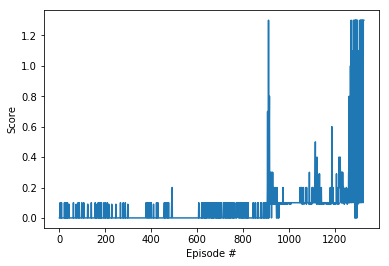

In [14]:

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(variable)), variable)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [16]:
from torchsummary import summary
summary(agent.agents[0].actor_local, (env.state_size,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       BatchNorm1d-1                   [-1, 24]              48
            Linear-2                  [-1, 400]          10,000
            Linear-3                  [-1, 300]         120,300
            Linear-4                    [-1, 2]             602
Total params: 130,950
Trainable params: 130,950
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.50
Estimated Total Size (MB): 0.51
----------------------------------------------------------------


/home/steven/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [17]:
summary(agent.agents[0].critic_local, [(env.state_size * env.num_agents,), (env.action_size * env.num_agents, )])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       BatchNorm1d-1                   [-1, 48]              96
            Linear-2                  [-1, 400]          19,600
            Linear-3                  [-1, 300]         121,500
            Linear-4                    [-1, 1]             301
Total params: 141,497
Trainable params: 141,497
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.54
Estimated Total Size (MB): 0.55
----------------------------------------------------------------


### Watch Smart Agent

In [1]:
from ddpg_agent import MultiAgent
from replay_buffer import ReplayBuffer
from multiEnvWrapper import MultipleEnvironmentWrapper
from unityagents import UnityEnvironment
import torch
import numpy as np

unity_env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")
env = MultipleEnvironmentWrapper(env=unity_env, train_mode=False)

buffer_size = int(1e5)
learning_rate_actor = 1e-4
learning_rate_critic = 1e-3
seed = 2
episodes_before_train = 300
batch_size = 256

replay_buffer = ReplayBuffer(buffer_size=buffer_size, seed=seed)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [2]:
agent = MultiAgent(
    num_agents=env.num_agents,
    replay_buffer=replay_buffer,
    state_dim=env.state_size,
    action_dim=env.action_size,
    episodes_before_train=episodes_before_train,
    fc1_units = 400,
    fc2_units = 300,
    lr_actor=learning_rate_actor,
    lr_critic=learning_rate_critic,
    batch_size=batch_size,
    discount=0.99,
    tau=1e-3,
    initial_noise_scale=1.0,
    noise_reduction=0.99,
    seed=seed)

In [4]:
for i, agent_i in enumerate(agent.agents):
    agent_i.actor_local.load_state_dict(torch.load(f"checkpoint_actor_{i}.pth"))
    agent_i.critic_local.load_state_dict(torch.load(f"checkpoint_critic_{i}.pth"))

In [5]:
states = env.reset()
score = np.zeros(env.num_agents)
for t in range(5000):
    actions = agent.act(states, add_noise=False)
    next_states, rewards, dones = env.step(actions)
    states = next_states
    
    score += rewards
    if np.any(dones):
        break
        
print(np.max(score))

/home/steven/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


2.600000038743019
